# 使用LSTM進行情感分析(Sentiment analysis) - Keras版
- Author: Lynn
- Updated: 2021/5/4
- Reference:
    - https://keras.io/examples/nlp/bidirectional_lstm_imdb/
    - https://www.tensorflow.org/tutorials/text/text_classification_rnn
    - https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### 前處理

In [3]:
# 載入資料集

import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive') # 此處需要登入google帳號

dataset_csv = '/content/drive/MyDrive/shared_folder/dataset/imdb/imdb_review.csv'
df = pd.read_csv(dataset_csv)
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


FileNotFoundError: ignored

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 前處理函式
# (轉小寫，去標點，去數字，去停用詞)

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

def preprocess_text(text):
    tokens = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS:
            tokens.append(token)
    return ' '.join(tokens)

In [ ]:
x_data = df['review']
y_data = df['sentiment']

# 進行前處理
x_data = x_data.apply(preprocess_text)

# label文字轉數字
y_data = y_data.replace('positive', 1)
y_data = y_data.replace('negative', 0)

# 印出前5筆資料
print(x_data.head())
print(y_data.head())

0    reviewers mentioned watching oz episode ll hoo...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter mattei love time money visually stunnin...
Name: review, dtype: object
0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64


In [ ]:
# 切分訓練集和測試集

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print(f'訓練集的維度：{x_train.shape}')
print(f'測試集的維度：{x_test.shape}')
print('\n')

print('訓練集前五筆：')
print(x_train.head())
print(y_train.head())
print('\n')

print('測試集前五筆：')
print(x_test.head())
print(y_test.head())

print(type(x_train))

訓練集的維度：(40000,)
測試集的維度：(10000,)


訓練集前五筆：
39087    kept asking fights screaming matches swearing ...
30893    watch entire movie watch entire movie stopped ...
45278    touching love story reminiscent mood love draw...
16398    day fulci schlocker totally abysmal concoction...
13653    firmly believe norwegian movies continually ge...
Name: review, dtype: object
39087    0
30893    0
45278    1
16398    0
13653    0
Name: sentiment, dtype: int64


測試集前五筆：
33553    liked summerslam look arena curtains look over...
9427     television shows appeal different kinds fans l...
199      film quickly gets major chase scene increasing...
12447    jane austen definitely approve br br gwyneth p...
39489    expectations somewhat high went movie thought ...
Name: review, dtype: object
33553    1
9427     1
199      0
12447    1
39489    0
Name: sentiment, dtype: int64
<class 'pandas.core.series.Series'>


### 編碼 (文字轉數值)

In [ ]:
### 編碼：將文字(詞)轉成數值

from keras.preprocessing.text import Tokenizer #分詞器:  分詞+建立辭典
from keras.preprocessing.sequence import pad_sequences

max_features = 20000
max_length = 200

# 建出詞典
tokenizer = Tokenizer(num_words=max_features)  #num_words 詞典數(避免辭典太大)  ex. 38000個字彙，設定限制30000， 38000個字彙算詞頻  排大-小，從大選到小(38k-8k) 
tokenizer.fit_on_texts(x_data) # x_data可以是list of strings或list of list  #fit on text !!
print(f'詞典字數：{len(tokenizer.word_index)}')

# 轉換成數值
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

# 以0補齊長度
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post') #截長補短 truncating =截斷  padding='post'
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

詞典字數：99089


In [ ]:
print('已編碼的資料:\n')
print('訓練集資料數量：', len(x_train), '\n')
print('測試集資料數量：', len(x_test), '\n')

print('訓練集第一筆：\n', x_train[:1], '\n')
print('測試集第一筆：\n', x_test[:1], '\n')

已編碼的資料:

訓練集資料數量： 40000 

測試集資料數量： 10000 

訓練集第一筆：
 [[  564  1882  1553  1739  4147  6164   566  4624    78  5687   539    14
   1702    13    25   854  2060   913   263   342   673   217    36  2614
   4297  2639    27  2851    82   241     1     1  4629 14112     8   185
      3   134  1578 10873    23   235  1328  9908   373   231   195    24
     22   183 10481  6198 11290   860   269    69   753  3913    48   244
    471   409    80    83   598   245     6  3218   113  9361     1     1
   1424    56 11390 11149   499  1691   908  2620 10425  3391  1433    75
     63   153   807  2500  8586  9403  3559     2   721 18325   290  2272
    461  9789 13720  1068    79  3855 17786    67   857  4075  4933  2033
    255   487  2721   969 13957  3251    36  1225   963  1368   638   970
    131  2563   221     1     1   106  3347   746 14601   994    71 15235
     54  1167   811  4314    76   180  3401  7963   623  3075  1484    41
     20  1265   152  3125  1573  4415  1107     3  3184  174

### 模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

emdedding_size = 128
output_size = 64
#dropout = 0.1
#recurrent_dropout = 0.1

model = Sequential()
model.add(Embedding(max_features, emdedding_size, input_length = max_length)) #Word Embedding 投射到200,300維度 (降維)(原本9萬維*x 個w)
           #2萬     #W Size         input_length 設定使之截長補短
#思考 如何用已經pre-trained的權重傳進來?
model.add(Bidirectional(LSTM(output_size, return_sequences=True))) #(可省略)  第一層 return_sequences=True要打開，不然第二層接不到
model.add(Bidirectional(LSTM(output_size))) #第二層  
#     #雙向   考量前後
# 股價不適合雙向 ，因為無法用未來推過去，因為無法預知未來           
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

#None的位置是batch，(unknown yet)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200, 128)          98816     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,757,761
Trainable params: 2,757,761
Non-trainable params: 0
_________________________________________________________________
None


### 訓練與測試

In [ ]:
from keras.callbacks import EarlyStopping

batch_size = 32
num_epochs = 5

model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])   #用accuracy評量

#early_stopping_callback = EarlyStopping()   #若有overfitting則呼叫

print('訓練中...')
history = model.fit(x_train,y_train,
          batch_size = batch_size,
          epochs = num_epochs,
          validation_split = 0.2)
          #callbacks = [early_stopping_callback])

print('測試中...')
loss, acc = model.evaluate(x_test, y_test, batch_size = batch_size)
print("誤差: %.3f, 準確率: %.3f" % (loss, acc))

# 儲存模型
model.save('/content/drive/MyDrive/Colab Notebooks/文本分類/bi_model.h5')

訓練中...
Epoch 1/5
1000/1000 [==============================] - 62s 58ms/step - loss: 0.4946 - accuracy: 0.7452 - val_loss: 0.3191 - val_accuracy: 0.8708
Epoch 2/5
1000/1000 [==============================] - 56s 56ms/step - loss: 0.2333 - accuracy: 0.9108 - val_loss: 0.2988 - val_accuracy: 0.8777
Epoch 3/5
1000/1000 [==============================] - 56s 56ms/step - loss: 0.1593 - accuracy: 0.9458 - val_loss: 0.3179 - val_accuracy: 0.8725
Epoch 4/5
1000/1000 [==============================] - 56s 56ms/step - loss: 0.1043 - accuracy: 0.9649 - val_loss: 0.3816 - val_accuracy: 0.8692
Epoch 5/5
1000/1000 [==============================] - 57s 57ms/step - loss: 0.0622 - accuracy: 0.9810 - val_loss: 0.4081 - val_accuracy: 0.8679
測試中...
313/313 [==============================] - 6s 15ms/step - loss: 0.3966 - accuracy: 0.8712
誤差: 0.397, 準確率: 0.871


In [ ]:
import pandas as pd

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.415954,0.805938,0.319093,0.870750
1,0.235124,0.908813,0.298753,0.877750
2,0.163148,0.942750,0.317925,0.872500
3,0.110570,0.962812,0.381618,0.869250
4,0.070335,0.977656,0.408089,0.867875


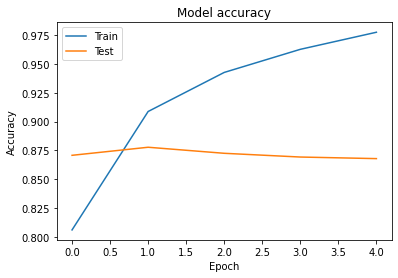

In [ ]:
# 匯製訓練和驗證的準確率

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

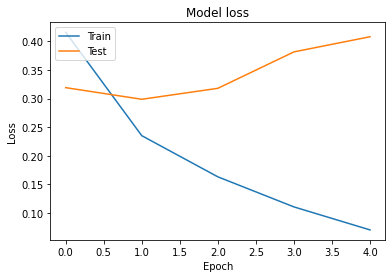

In [ ]:
# 匯製訓練和驗證的損失值

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 進行預測

In [ ]:
#載入模型
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/文本分類/bi_model.h5')

# 準備預測資料
sentences = ['I love it.', 'It is so boring.', 'I love it althougn it is so boring.']
x_pred = pd.Series(sentences)
x_pred = x_pred.apply(preprocess_text)
x_pred = tokenizer.texts_to_sequences(x_pred)
x_pred = pad_sequences(x_pred, maxlen=max_length, padding='post', truncating='post')

# 進行預測
labels = [int(round(x[0])) for x in model.predict(x_pred)]
label2word = {1:'正面', 0:'負面'}

# 逐句印出結果
for i in range(len(sentences)):
    print('{}   {}'.format(label2word[labels[i]], sentences[i]))

正面   I love it.
負面   It is so boring.
負面   I love it althougn it is so boring.
